# Prosper Loan Data Exploration
## By Awurigwe Joseph

## Introduction

Prosper is a P2P lending platform that allows investors to choose among personal loans to invest in. They do that by considering a number of factors, which include a custom calculated Prosper Score that represents the risk for each loan. The higher the score, the lower the risk, and the lower the interest rates paid by the borrower to the investors.

## Preliminary Wrangling

In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Loading in the csv file to a dataframe and geting an overview with the head() function
df = pd.read_csv('../input/prosper-loan-data/prosperLoanData.csv')
df.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# getting the dimensions of the dataframe
df.shape

(113937, 81)

In [4]:
# dataframe and columns info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
# getting a statistical summary of the numerical columns
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


There are a lot of data columns (81) in the dataframe, so we're only going to work with what we need for the purpose of the analysis

In [6]:
# columns to be extracted for analysis
target_columns = ['Term', 'LoanStatus', 'BorrowerRate', 'BorrowerAPR', 'ProsperRating (numeric)',
                  'ProsperScore', 'ListingCategory (numeric)', 'Occupation', 'EmploymentStatus', 
                  'IsBorrowerHomeowner', 'DelinquenciesLast7Years', 'IncomeRange', 'LoanOriginalAmount',
                  'LoanOriginationDate', 'Recommendations']

This was decided after going through the variable definitions at this [link](https://docs.google.com/spreadsheets/d/1uksD5PNb2yirV0dgi0jJKwruXo6UFDc6QZ2grscUTT8/edit#gid=0), pulled out columns that I figured would help my analysis

In [7]:
# creating a new dataframe with just the target columns
loan = df[target_columns]

# verifying extraction
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerRate               113937 non-null  float64
 3   BorrowerAPR                113912 non-null  float64
 4   ProsperRating (numeric)    84853 non-null   float64
 5   ProsperScore               84853 non-null   float64
 6   ListingCategory (numeric)  113937 non-null  int64  
 7   Occupation                 110349 non-null  object 
 8   EmploymentStatus           111682 non-null  object 
 9   IsBorrowerHomeowner        113937 non-null  bool   
 10  DelinquenciesLast7Years    112947 non-null  float64
 11  IncomeRange                113937 non-null  object 
 12  LoanOriginalAmount         113937 non-null  int64  
 13  LoanOriginationDate        11

Changing the `LoanOriginationDate` column to a datetime format and creating a new 'year' column from it that would aid our analysis

In [8]:
#Converting LoanOriginationDate to datetime 
loan['LoanOriginationDate'] = pd.to_datetime(loan['LoanOriginationDate'])

#Extracting Year information from that
loan['year']= loan['LoanOriginationDate'].dt.year

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


The `ProsperRating (numeric)` and `ProsperScore` are integral part of my analysis so I'm dropping rows which have null values in the columns

I'm also going to rename the column names with spaces in them such as to enable me use the dot notation

In [9]:
# renaming the column names
loan.rename(columns={'ProsperRating (numeric)':'ProsperRatingNumeric', 'ListingCategory (numeric)':'ListingCategoryNumeric'}, inplace=True)

# dropping rows with missing values in `ProsperRatingNumeric` and `ProsperScore`
#loan = loan.dropna(subset=['ProsperRatingNumeric', 'ListingCategoryNumeric'], inplace=True)
loan = loan.dropna(subset=['ProsperRatingNumeric', 'ListingCategoryNumeric'])
# verifying operation worked
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Term                     84853 non-null  int64         
 1   LoanStatus               84853 non-null  object        
 2   BorrowerRate             84853 non-null  float64       
 3   BorrowerAPR              84853 non-null  float64       
 4   ProsperRatingNumeric     84853 non-null  float64       
 5   ProsperScore             84853 non-null  float64       
 6   ListingCategoryNumeric   84853 non-null  int64         
 7   Occupation               83520 non-null  object        
 8   EmploymentStatus         84853 non-null  object        
 9   IsBorrowerHomeowner      84853 non-null  bool          
 10  DelinquenciesLast7Years  84853 non-null  float64       
 11  IncomeRange              84853 non-null  object        
 12  LoanOriginalAmount       84853 

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
loan.head()


,Term,LoanStatus,BorrowerRate,BorrowerAPR,ProsperRatingNumeric,ProsperScore,ListingCategoryNumeric,Occupation,EmploymentStatus,IsBorrowerHomeowner,DelinquenciesLast7Years,IncomeRange,LoanOriginalAmount,LoanOriginationDate,Recommendations,year
1,36,Current,0.0920,0.12016,6.0,7.0,2,Professional,Employed,False,0.0,"$50,000-74,999",10000,2014-03-03,0,2014
3,36,Current,0.0974,0.12528,6.0,9.0,16,Skilled Labor,Employed,True,14.0,"$25,000-49,999",10000,2012-11-01,0,2012
4,36,Current,0.2085,0.24614,3.0,4.0,2,Executive,Employed,True,0.0,"$100,000+",15000,2013-09-20,0,2013
5,60,Current,0.1314,0.15425,5.0,10.0,1,Professional,Employed,True,0.0,"$100,000+",15000,2013-12-24,0,2013
6,36,Current,0.2712,0.31032,2.0,2.0,1,Sales - Retail,Employed,False,0.0,"$25,000-49,999",3000,2013-04-18,0,2013


In [11]:
loan.shape

(84853, 16)

### What is the structure of your dataset?

> There are 113,937 loans in the dataset with 81 features.  Most variables are numeric and categorical in nature.Now trimmed down to 84,853 rows and 15 columns

### What is/are the main feature(s) of interest in your dataset?

> Trying to figure out what features can be used to predict default on credit. Also i would like to check what are major factors connected with prosper credit rating.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think that the Prosper ratings and prosper score would have the greatest impact on the posibility of loan default, since they were introduced in July 2009 after which the rate of loan defaults decreased by a lot.

> I also think that Loan amount and employment status would also have an impact cause they would be what will help in deciding the prosper rating

## Univariate Exploration

### Prosper Rating (Numeric)

The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.

I'll do a countplot to get a feel for the distribution of the variable

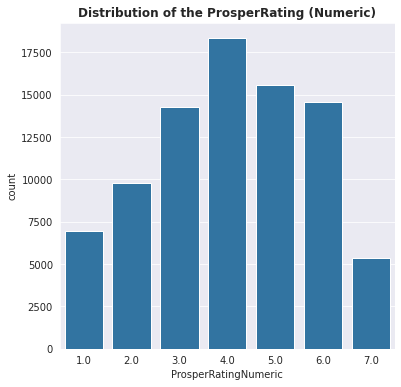

In [14]:
# setting base color
base_color = sb.color_palette()[0]
# setting theme
sb.set_style("darkgrid")

# countplot
plt.figure(figsize=[6,6])

sb.countplot(data= loan, x= "ProsperRatingNumeric", color=base_color);
plt.title("Distribution of the ProsperRating (Numeric)", fontweight='bold');

**Observation**

- from the plot above, we can see the distribution of the Prosper Rating follows a normal distribution and is Unimodal
- The 4 rating is the most common rating given to customers with the `1` and `7` the least.

### Employment Status

The employment status of the borrower at the time they posted the listing.

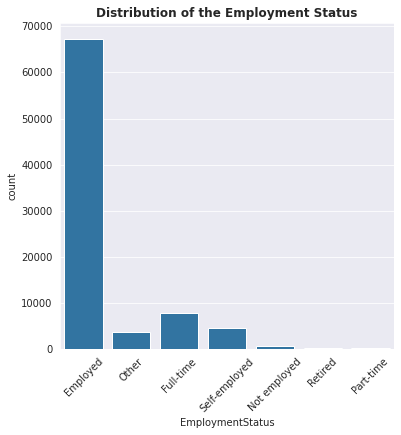

In [15]:
# countplot
plt.figure(figsize=[6,6])
sb.countplot(data= loan, x= "EmploymentStatus", color=base_color);
plt.title("Distribution of the Employment Status", fontweight='bold');
plt.xticks(rotation=45);

**Observation**
- The 'Employed' persons make up most of the borrowers
- "Full-time" and "Self-employed" makes up most of the small groups

### Interest Rate

The Borrower's interest rate for this loan. 

In [16]:
loan.BorrowerRate.value_counts()

0.3177    3672
0.3199    1645
0.2699    1314
0.1099     932
0.3500     802
          ... 
0.3094       1
0.1525       1
0.2125       1
0.2784       1
0.2665       1
Name: BorrowerRate, Length: 1229, dtype: int64

In [17]:
#getting the statistical description
loan.BorrowerRate.describe()

count    84853.000000
mean         0.196022
std          0.074631
min          0.040000
25%          0.135900
50%          0.187500
75%          0.257400
max          0.360000
Name: BorrowerRate, dtype: float64

We have to bin the values in order to make inferences from the data

In [18]:
# binning the values with the pandas cut()
bins = np.arange(0.04, loan.BorrowerRate.max()+0.025, 0.025)
loan['Binned_BorrowerRate'] = pd.cut(loan['BorrowerRate'], bins)

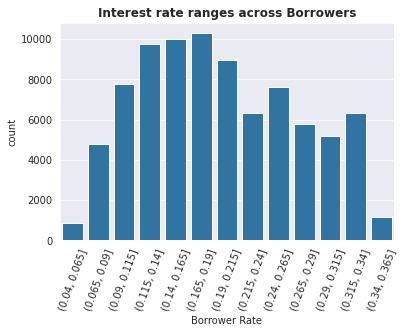

In [19]:
# countplot
plt.title("Interest rate ranges across Borrowers", fontweight='bold')
plt.xticks(rotation=70)
plt.xlabel("Borrowers Rate")
ax = sb.countplot(data=loan, x='Binned_BorrowerRate', color=base_color);
ax.set(xlabel='Borrower Rate');

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


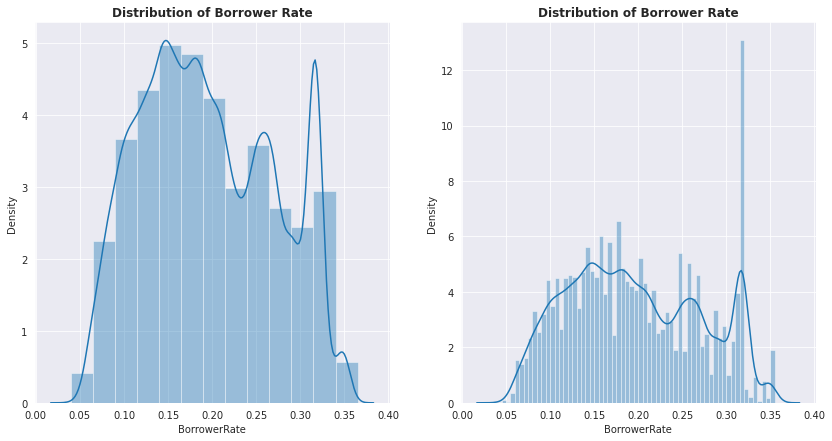

In [20]:

plt.figure(figsize=[14,7])

plt.subplot(1,2,1)
bins = np.arange(0.04, loan.BorrowerRate.max()+0.025, 0.025)
sb.distplot(loan.BorrowerRate, bins=bins);
plt.title("Distribution of Borrower Rate", fontweight= 'bold');

plt.subplot(1,2,2)
bins = np.arange(0.04, loan.BorrowerRate.max()+0.005, 0.005)
sb.distplot(loan.BorrowerRate, bins=bins);
plt.title("Distribution of Borrower Rate", fontweight= 'bold');

From the histogram, we can clearly see the distribution the borrower rate, It has a multimodal distribution.
The variable peaked at the 3.15-3.20 bin. Which means that the majority of the borrower rates are in that region

### Loan Term

The length of the loan expressed in months.

In [21]:
#Getting Value counts
loan.Term.value_counts()

36    58695
60    24545
12     1613
Name: Term, dtype: int64

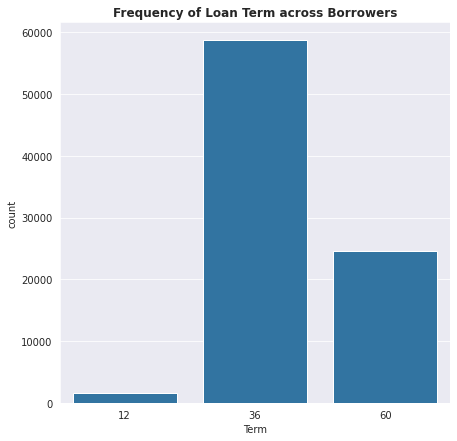

In [22]:
# countplot
plt.figure(figsize=[7,7])
sb.countplot(data= loan, x= "Term", color=base_color);
plt.title("Frequency of Loan Term across Borrowers", fontweight='bold');

**Observation**
- The most loan period is 36 months (3 Years)
- The Least Popular Loan Term is the 12 Months Term (1 Year)
- There are only 3 value options for the loan length which are 12 months(1 Year), 36 Months (3 Years) and 60 months (5 Years), which tells us that these are the only length offered by the company

### Income Range

The income range of the borrower at the time the listing was created.

We'll look at the income range of the borrowers which is one of the features that are present as part of our exploratory process 

In [23]:
# checking the range of the income range column
loan.IncomeRange.value_counts()

$50,000-74,999    25627
$25,000-49,999    24175
$100,000+         15205
$75,000-99,999    14498
$1-24,999          4654
Not employed        649
$0                   45
Name: IncomeRange, dtype: int64

We have some rows with "Not Employed", I'll change them to $0 so that we can plot them together

In [24]:
#replacing 'Not Employed' with '$0'
loan['IncomeRange'].replace(['Not employed'], '$0', inplace = True)
loan.IncomeRange.value_counts()

$50,000-74,999    25627
$25,000-49,999    24175
$100,000+         15205
$75,000-99,999    14498
$1-24,999          4654
$0                  694
Name: IncomeRange, dtype: int64

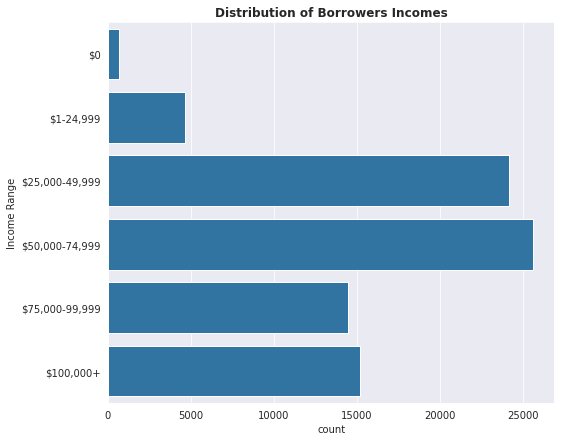

In [25]:
# countplot
plt.figure(figsize=[8,7])
income_order = ['$0', '$1-24,999', '$25,000-49,999', 
                '$50,000-74,999','$75,000-99,999', '$100,000+']
sb.countplot(data = loan, y = 'IncomeRange', color=base_color, order=income_order)
plt.ylabel('Income Range')

plt.title('Distribution of Borrowers Incomes', fontweight='bold');

**Observation**

- The Amount of people that have no income is only a small part of the total 
- Most of the customers fall in the '$50,000-74,999' and '$25,000-49,999' range.
- Those that earn $75k to $100k is almost the same with those that earn $100k+

### Loan Status

The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

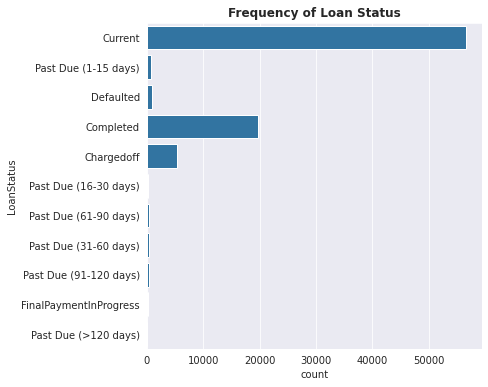

In [26]:
#bar
plt.figure(figsize=[6,6])
sb.countplot(data= loan, y= "LoanStatus", color= base_color);
plt.title("Frequency of Loan Status", fontweight='bold');

In [27]:
# getting stats
loan.LoanStatus.value_counts()

Current                   56576
Completed                 19664
Chargedoff                 5336
Defaulted                  1005
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

We need to do some adjustment to this, We need to change the Chargedoff to Defaulted

In [28]:
# replacing Chargedoff to Defaulted
loan['LoanStatus'] = loan.LoanStatus.replace('Chargedoff','Defaulted')

In [29]:
loan.LoanStatus.value_counts()

Current                   56576
Completed                 19664
Defaulted                  6341
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

We don't actually need the rest of the noise, so we're going to drop them

In [30]:
def filter_rows_by_values(df, col, values):
    return df[df[col].isin(values)]

loan = filter_rows_by_values(loan, 'LoanStatus', ['Completed', 'Defaulted'])

In [31]:
loan.LoanStatus.value_counts()

Completed    19664
Defaulted     6341
Name: LoanStatus, dtype: int64

We are now left with 19,664 Completed Loans and 6341 Defaulted, this would form the basic for our further analysis

**Observations**

- The current loans consist the bulk of the loans, so we dropped them so that it wouldn't hamper our analysis
- Among the lesser categories, we see the completed loans take the highest frequency

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
> I looked at loan status, prosper rating, employment status, interest rate, loan term and income range.

> The majority of the loan status were the current loans

> The Prosper rating followed a normal distribution pattern, peaking at 4

> Majority of the Borrowers were employed, suprisingly, there were only little of unemployed 

> The Most Popular Loan term was the 36 months option, there were only 3 possible options seen, which tells us that Prosper only offer 1,3,5 year loan terms


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
> In the employment status, I changed the `Not Employed` to `$0` in order to make the plots more concise

## Bivariate Exploration

We'll explore some relationships between some variables in this section in order to draw more conclusions

### Employment Status and Proper Rating

Does a borrower's Employment Status have an effect on his/her Prosper Rating

In [32]:
plt.figure(figsize=[8,8])

sb.regplot(data= loan, x= )

SyntaxError: invalid syntax (2154246931.py, line 3)